In [2]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Carbon_footprint_ml_model/CarbonEmission.csv")


In [3]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [4]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split


target = 'CarbonEmission'
X = df.drop(columns=[target])
y = df[target]
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna(X[col].mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()


train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, cat_features=categorical_cols)

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

cat_model.fit(train_pool)


y_test_pred = cat_model.predict(test_pool)

y_train_pred = cat_model.predict(train_pool)


0:	learn: 952.4783674	total: 61.7ms	remaining: 30.8s
100:	learn: 224.0415484	total: 1.5s	remaining: 5.95s
200:	learn: 169.7676330	total: 2.97s	remaining: 4.42s
300:	learn: 145.1920187	total: 4.39s	remaining: 2.9s
400:	learn: 129.9998497	total: 5.82s	remaining: 1.44s
499:	learn: 119.0786703	total: 8.24s	remaining: 0us


In [5]:
X.dtypes

,0
Body Type,object
Sex,object
Diet,object
How Often Shower,object
Heating Energy Source,object
Transport,object
Vehicle Type,object
Social Activity,object
Monthly Grocery Bill,int64
Frequency of Traveling by Air,object


In [6]:
categorical_cols

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Frequency of Traveling by Air',
 'Waste Bag Size',
 'Energy efficiency',
 'Recycling',
 'Cooking_With']

In [7]:
cat_model.feature_names_


['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Monthly Grocery Bill',
 'Frequency of Traveling by Air',
 'Vehicle Monthly Distance Km',
 'Waste Bag Size',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'Energy efficiency',
 'Recycling',
 'Cooking_With']

In [8]:
from sklearn.metrics import r2_score, mean_squared_error


n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]

# Training metrics
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p - 1))
mse_train = mean_squared_error(y_train, y_train_pred)

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p - 1))
mse_test = mean_squared_error(y_test, y_test_pred)

# Display results
print("\n📊 CatBoost Evaluation Results with Best Hyperparameters:")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Train Adjusted R²: {adj_r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test Adjusted R²: {adj_r2_test:.4f}")


📊 CatBoost Evaluation Results with Best Hyperparameters:
Train MSE: 12027.6650
Train R²: 0.9884
Train Adjusted R²: 0.9883
Test MSE: 15825.4786
Test R²: 0.9848
Test Adjusted R²: 0.9846


/tmp/ipython-input-9-2652132822.py:23: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2652132822.py:23: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


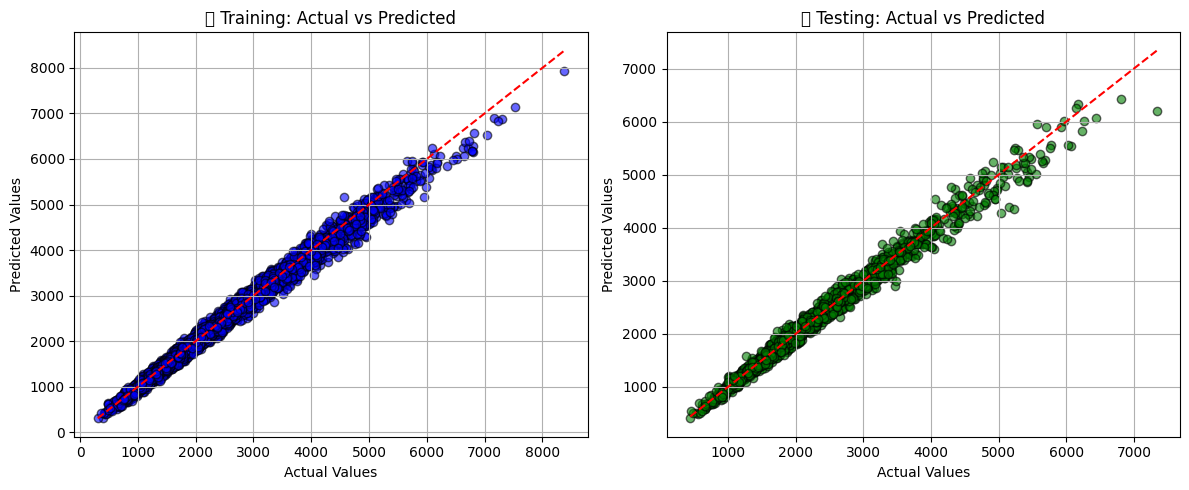

In [9]:
import matplotlib.pyplot as plt

# Plot for training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Training: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Testing: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(cat_model, 'catboost_model_new.pkl')

['catboost_model_new.pkl']

In [ ]:
import pandas as pd
import numpy as np

shap_values = cat_model.get_feature_importance(test_pool, type='ShapValues')

base_values = shap_values[:, -1]
contributions = shap_values[:, :-1]


reconstructed_preds = base_values + contributions.sum(axis=1)

shap_df = pd.DataFrame(contributions, columns=cat_model.feature_names_)
shap_df['Bias'] = base_values
shap_df['Prediction'] = reconstructed_preds
shap_df['Actual'] = y_test.reset_index(drop=True)


print(shap_df.head())


    Body Type         Sex       Diet  How Often Shower  Heating Energy Source  \
0  -98.927651 -122.741138 -50.080310          6.031779            -171.065853   
1 -103.604704 -148.206170  44.373512         -5.926365               0.828833   
2 -220.212798  158.841158 -31.879672         -5.892965             -10.158463   
3 -153.991330 -183.296788  87.655049         10.804045               1.708927   
4 -122.207035  169.304622  -4.015712         18.118916             177.236277   

    Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
0  -51.165195    -79.051154        70.894948             15.428468   
1  -56.625292    -83.274422       -60.941040            -90.075737   
2   50.021303     18.281768        78.705532            -98.835923   
3  109.916705     64.877938       -58.768674             47.169990   
4  -48.719336    -75.004005       -61.244179            -24.499334   

   Frequency of Traveling by Air  ...  Waste Bag Weekly Count  \
0                    -324.9